《Problem Solving with Algorithms and Data Structures using Python》

国外非常出名的教材，带IDE的网页版本，地址：http://interactivepython.org/courselib/static/pythonds/index.html

# 排序算法综述

排序算法可以分为内部排序和外部排序。

内部排序：数据记录在内存中进行排序。

    常见的内部排序算法有：插入排序、希尔排序、选择排序、冒泡排序、归并排序、快速排序、堆排序、基数排序等

外部排序：因排序的数据很大，一次不能容纳全部的排序记录，在排序过程中需要访问外存。



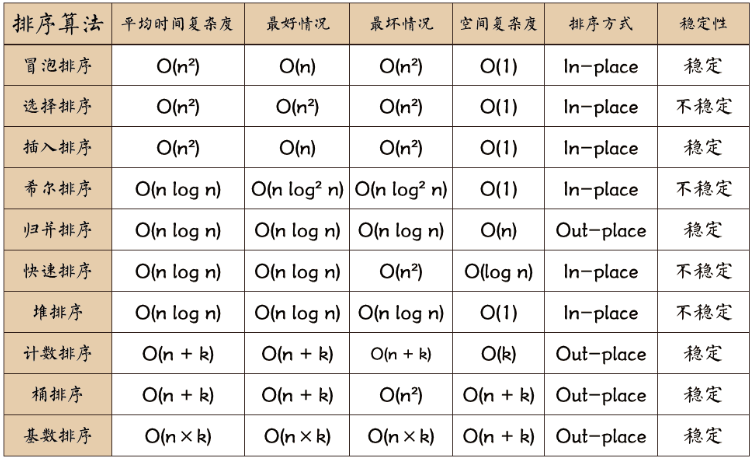
- 稳定：当排序后两个相等键值的顺序和排序之前的顺序相同
- n: 代表数据规模及数据量大小
- k: 桶的个数
- In-place: 不占用额外内存，只占用常数内存
- Out-place: 占用额外内存

[Sorting Algorithms Animations](https://www.toptal.com/developers/sorting-algorithms)
展示了直观的排序算法对比。

size = 20
![pic1](./pic/sort_all_1.gif)
size = 40, 50见网页

- initial condition (input order and key distribution) affects performance as much as the algorithm choice.

The ideal sorting algorithm would have the following properties:

- Stable: Equal keys aren’t reordered.
- Operates in place, requiring O(1) extra space.
- Worst-case O(n·lg(n)) key comparisons.
- Worst-case O(n) swaps.
- Adaptive: Speeds up to O(n) when data is nearly sorted or when there are few unique keys.

There is no algorithm that has all of these properties, and so the choice of sorting algorithm depends on the application.

Sorting is a vast topic; this site explores the topic of in-memory generic algorithms for arrays. External sorting, radix sorting, string sorting, and linked list sorting—all wonderful and interesting topics—are deliberately omitted to limit the scope of discussion.

In [1]:
from random import randint
import timeit

In [2]:
def gen_alist(num, maximum):
    return [randint(-maximum, maximum) for _ in range(num)]
    
    
def nearly_sorted_list(num, swaptimes):
    alist = [n for n in range(num)]
    for i in range(swaptimes):
        index_a = randint(0, num)
        index_b = randint(0, num)
        alist[index_a], alist[index_b] = alist[index_b], alist[index_a]
    return alist


def sorted_list(num):
    return [n for n in range(0, num)]


def reversed_list(num):
    alist = [n for n in range(num, 0, -1)]
    return alist


def few_unique(num, maximum):
    """maximum取较小的值"""
    return [randint(0, maximum) for _ in range(num)]


def isSorted(alist):
    for i in range(len(alist) - 1):
        if alist[i] > alist[i+1]:
            return False
    return True

In [3]:
# 性能测试的原始数据
origin_list = gen_alist(5000, 2000)
origin_nearly_sorted = nearly_sorted_list(5000, 30)
origin_sorted_list = sorted_list(5000)
origin_reversed_list = reversed_list(5000)
origin_few_unique = few_unique(5000, 10)

# 冒泡排序Bubble Sort

资料来源：[visualgo](https://visualgo.net/zh/sorting)
![3](./pic/bubble.gif)

每次对相邻元素进行两两比较，如果顺序和预先规定的顺序不一致，则进行位置交换；这样一次遍历会将最大或最小的数据上浮到顶端

In [20]:
def bubbleSort(alist):
    exchange = False
    last_n = len(alist)
    for i in range(last_n - 1, 0, -1):  # last_n相当于已排序的第一个index
        for j in range(i):              # 开始遍历未排序部分
            if alist[j] > alist[j+1]:
                alist[j], alist[j+1] = alist[j+1], alist[j]
                exchange = True
        # 短路设置，碰到一个有序列表以后会立刻停止遍历，O(n)
        if not exchange: 
            break
    return alist

In [21]:
# 判断有效性
list_1 = gen_alist(10, 20)
print(isSorted(list_1))

list_1_bub = bubbleSort(list_1)
print(isSorted(list_1_bub))

False
True


In [22]:
# make a copy
# 使用切片可以真正将一份list复制给其他变量，alist=list，指针指向同一个对象
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

In [23]:
t1 = timeit.Timer('bubbleSort(alist)', 'from __main__ import bubbleSort,alist')
print('(短路)冒泡排序: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('bubbleSort(blist)', 'from __main__ import bubbleSort,blist')
print('(短路)冒泡排序(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('bubbleSort(clist)', 'from __main__ import bubbleSort,clist')
print('(短路)冒泡排序(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('bubbleSort(dlist)', 'from __main__ import bubbleSort,dlist')
print('(短路)冒泡排序(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('bubbleSort(elist)', 'from __main__ import bubbleSort,elist')
print('(短路)冒泡排序(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

(短路)冒泡排序: 2.3319314 s
(短路)冒泡排序(近乎有序输入): 1.1445265999999998 s
(短路)冒泡排序(有序输入): 0.00040729999999999933 s
(短路)冒泡排序(逆序有序输入): 3.2534931000000005 s
(短路)冒泡排序(多重复值输入): 2.127923 s
True
True
True
True
True


# 选择排序Selection Sort

![4](./pic/selection.gif)

先在数据中找出最大或最小的元素，放到序列的起始；然后再从余下的数据中继续寻找最大或最小的元素，依次放到排序序列中，直到所有数据样本排序完成。

In [23]:
def selectionSort(alist):
    for i in range(len(alist)):
        minposition = i                        # 记录最小值index
        for j in range(i, len(alist)):
            if alist[minposition] > alist[j]:  # 寻找未排序部分最小值index
                minposition = j
        # 不同于bubble，找到最小值之后，才swap
        alist[i], alist[minposition] = alist[minposition], alist[i]
    return alist

In [24]:
def selectionSort_2(alist):
    """优化之后的selectionSort"""
    left = 0
    right = len(alist) - 1
    while left < right:
        minIndex = left
        maxIndex = right
        
        # 在每一轮查找时, 要保证alist[minIndex] <= alist[maxIndex]
        if alist[minIndex] > alist[maxIndex]:
            alist[minIndex], alist[maxIndex] = alist[maxIndex], alist[minIndex]
        
        for i in range(left+1, right):  # 同时查找最大最小的index
            if alist[i] < alist[minIndex]:
                minIndex = i
            elif alist[i] > alist[maxIndex]:
                maxIndex = i
        
        alist[left], alist[minIndex] = alist[minIndex], alist[left]
        alist[right], alist[maxIndex] = alist[maxIndex], alist[right]
        
        left += 1
        right -= 1
    
    return alist

In [25]:
# selectionSort_2优化
list_2 = gen_alist(10, 20)
print(isSorted(list_2))

list_2_ = selectionSort_2(list_1)
print(isSorted(list_2_))

False
True


In [45]:
list_2 = gen_alist(10, 20)
print(isSorted(list_2))

list_2_ = selectionSort(list_2)
print(isSorted(list_2_))

False
True


In [28]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

In [29]:
t1 = timeit.Timer('selectionSort(alist)', 'from __main__ import selectionSort,alist')
print('选择排序: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('selectionSort(blist)', 'from __main__ import selectionSort,blist')
print('选择排序(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('selectionSort(clist)', 'from __main__ import selectionSort,clist')
print('选择排序(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('selectionSort(dlist)', 'from __main__ import selectionSort,dlist')
print('选择排序(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('selectionSort(elist)', 'from __main__ import selectionSort,elist')
print('选择排序(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

选择排序: 0.9047820000000115 s
选择排序(近乎有序输入): 0.9384635000000117 s
选择排序(有序输入): 0.8223904999999831 s
选择排序(逆序有序输入): 0.8848974999999655 s
选择排序(多重复值输入): 0.8277772000000141 s
True
True
True
True
True


In [30]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('selectionSort_2(alist)', 'from __main__ import selectionSort_2,alist')
print('（优化）选择排序: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('selectionSort_2(blist)', 'from __main__ import selectionSort_2,blist')
print('（优化）选择排序(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('selectionSort_2(clist)', 'from __main__ import selectionSort_2,clist')
print('（优化）选择排序(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('selectionSort_2(dlist)', 'from __main__ import selectionSort_2,dlist')
print('（优化）选择排序(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('selectionSort_2(elist)', 'from __main__ import selectionSort_2,elist')
print('（优化）选择排序(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

（优化）选择排序: 0.7576728999999887 s
（优化）选择排序(近乎有序输入): 0.8593062999999574 s
（优化）选择排序(有序输入): 0.7050054999999702 s
（优化）选择排序(逆序有序输入): 0.6859795000000304 s
（优化）选择排序(多重复值输入): 0.6955205000000433 s
True
True
True
True
True


# 插入排序Insertion Sort

![5](./pic/Insertion.gif)

对于未排序的数据，在已排序序列中从后向前扫描，找到相应的位置并插入，类似<span class="mark">打扑克牌时的码牌</span>。如果待插入的元素与有序序列中的某个元素相等，则将待插入元素插入到相等元素的后面。

In [31]:
def insertionSort(alist):
    for i in range(1, len(alist)):
        temp = alist[i]            # 缓存待插入数据
        pointer = i
        while alist[pointer-1] > temp and pointer > 0:  # 查看已排序部分，寻找插入位置
            alist[pointer] = alist[pointer-1]           # 较大值后移
            pointer -= 1
        alist[pointer] = temp
    return alist

# 一种低效的实现
# for i in range(1, len(alist)):
#     for j in range(i, 1, -1):
#         if alist[j-1] > alist[j]: 
#             alist[j], alist[j-1] = alist[j-1], alist[j]
# alist[j], alist[j-1] = alist[j-1], alist[j]一句多了很多冗余的交换操作

In [46]:
list_2 = gen_alist(10, 20)
print(isSorted(list_2))

list_2_ = insertionSort(list_2)
print(isSorted(list_2_))

False
True


In [33]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('insertionSort(alist)', 'from __main__ import insertionSort,alist')
print('插入排序: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('insertionSort(blist)', 'from __main__ import insertionSort,blist')
print('插入排序(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('insertionSort(clist)', 'from __main__ import insertionSort,clist')
print('插入排序(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('insertionSort(dlist)', 'from __main__ import insertionSort,dlist')
print('插入排序(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('insertionSort(elist)', 'from __main__ import insertionSort,elist')
print('插入排序(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

插入排序: 1.3615615000001071 s
插入排序(近乎有序输入): 0.017630199999985052 s
插入排序(有序输入): 0.0006989000000885426 s
插入排序(逆序有序输入): 2.527236099999982 s
插入排序(多重复值输入): 1.1618934000000536 s
True
True
True
True
True


对于完全有序的数组，插入排序法和冒泡排序法也将成为O(n)级别的算法，可用于测试，效率高

# 希尔排序Shell Sort

希尔排序也称递减增量排序，是插入排序的一种改进版本，效率虽高，但它是一种不稳定的排序算法。

插入排序在对几乎已经排好序的数据操作时，效果是非常好的；但是插入排序<span class="mark">每次只能移动一位数据</span>，因此插入排序效率比较低

希尔排序是将整个数据序列分割成若干子序列分别进行直接插入排序，待整个序列中的记录基本有序时，再对全部数据进行依次直接插入排序

这样可以让一个元素可以一次性地朝最终位置前进一大步。然后算法再取越来越小的步长进行排序，算法的最后一步就是普通的插入排序，但是到了这步，需排序的数据几乎是已排好的了

将数组列在一个表中并对列排序（用插入排序）。重复这过程，不过每次用更长的列来进行。最后整个表就只有一列了。将数组转换至表是为了更好地理解这算法，算法本身仅仅对原数组进行排序（<span class="mark">通过增加索引的步长，例如是用i += step_size而不是i++</span>）
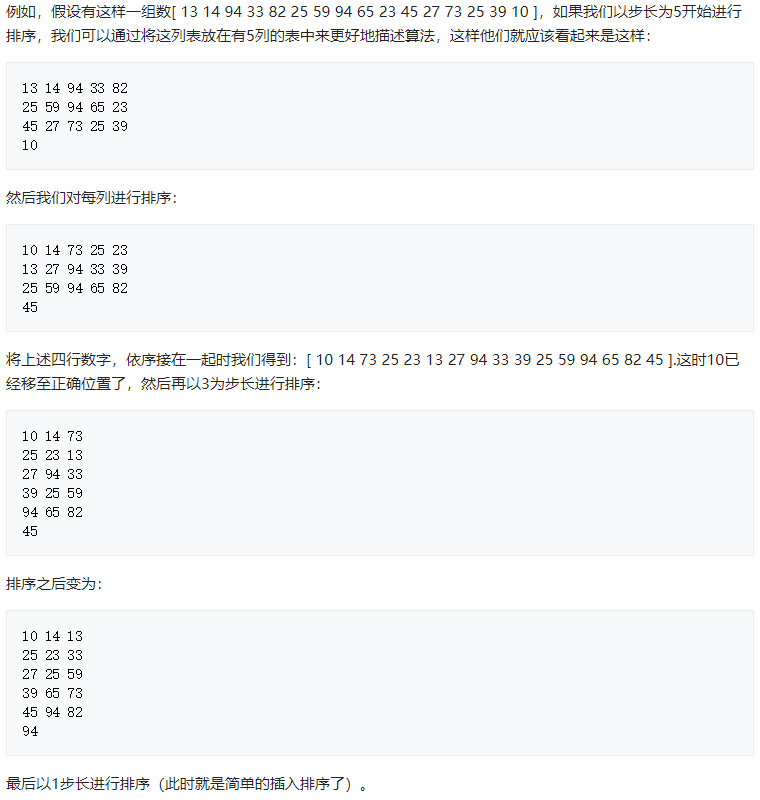wiki

<span class="mark">比较在希尔排序中是最主要的操作，而不是交换。</span>

用这样步长序列的希尔排序比插入排序要快，甚至在小数组中比快速排序和堆排序还快，但是在涉及大量数据时希尔排序还是比快速排序慢。

![13](./pic/shell_2.gif)

来源[sorting](http://sorting.at/)
![6](./pic/shell.gif)

In [37]:
def shellSort(alist):
    gap = 1
    # gap will be：1, 4, 13, 40, 121, 364, 1093...
    while gap < len(alist) // 3:  
        gap = 3 * gap + 1
    # gap = len(alist)//2
    
    while gap > 0:
        for startpos in range(gap):
            gapInsertionSort(alist, startpos, gap)
        gap = gap // 3
    
    return alist


def gapInsertionSort(alist, startpos, gap):
    # 对 arr[i], arr[i-h], arr[i-2*h], arr[i-3*h]... 使用插入排序
    for i in range(startpos + gap, len(alist), gap):
        position = i
        currentvalue = alist[i]
        
        while position >= gap and alist[position - gap] > currentvalue:
            alist[position] = alist[position - gap]
            position = position - gap
        
        alist[position] = currentvalue

In [47]:
list_2 = gen_alist(10, 20)
print(isSorted(list_2))

list_2_ = shellSort(list_2)
print(isSorted(list_2_))

False
True


In [39]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('shellSort(alist)', 'from __main__ import shellSort,alist')
print('希尔排序: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('shellSort(blist)', 'from __main__ import shellSort,blist')
print('希尔排序(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('shellSort(clist)', 'from __main__ import shellSort,clist')
print('希尔排序(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('shellSort(dlist)', 'from __main__ import shellSort,dlist')
print('希尔排序(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('shellSort(elist)', 'from __main__ import shellSort,elist')
print('希尔排序(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

希尔排序: 0.022927600000002712 s
希尔排序(近乎有序输入): 0.01230200000009063 s
希尔排序(有序输入): 0.010046599999895989 s
希尔排序(逆序有序输入): 0.013235500000064349 s
希尔排序(多重复值输入): 0.011936299999888433 s
True
True
True
True
True


# 归并排序Merge Sort

采用分治法（Divide and Conquer）。

首先将数据样本拆分为两个子数据样本, 并分别对它们排序, 再递归的拆分、排序, 直到最后数据序列为1，最后组合。

严格遵循从左到右或从右到左的顺序合并子数据序列, 它不会改变相同数据之间的相对顺序, 因此归并排序是一种稳定的排序算法。

归并排序的实现分为两种方法：
- 自上而下的递归；
- 自下而上的迭代

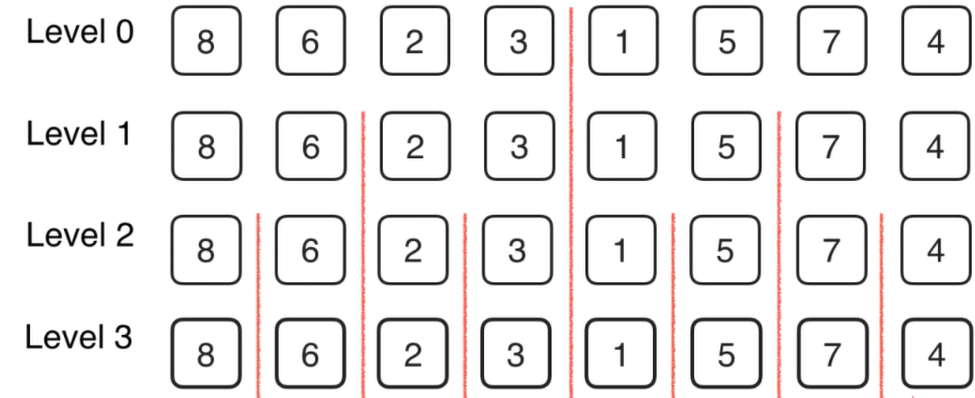
- 分为三级，log(n)
- 每一级归并，O(n)
- nloag(n)

![merge2](./pic/merge_2.gif)

加入辅助空间，三个指针，三个标识index
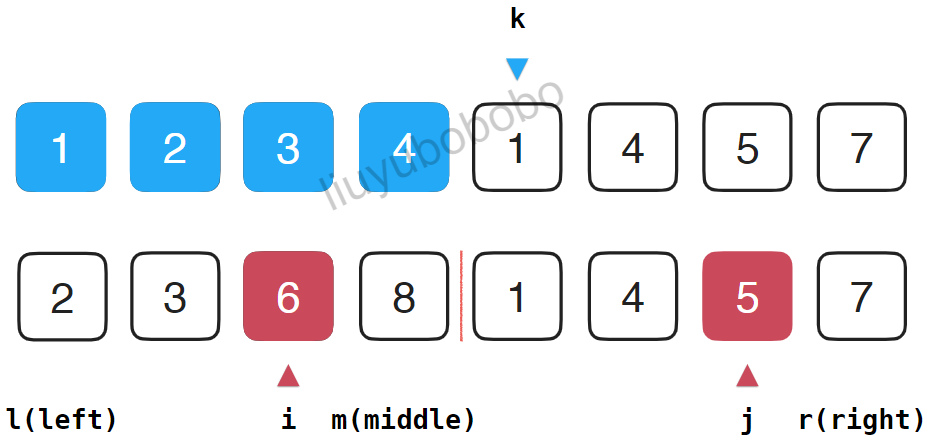
![merge3](./pic/merge_3.gif)

![7](./pic/merge.gif)

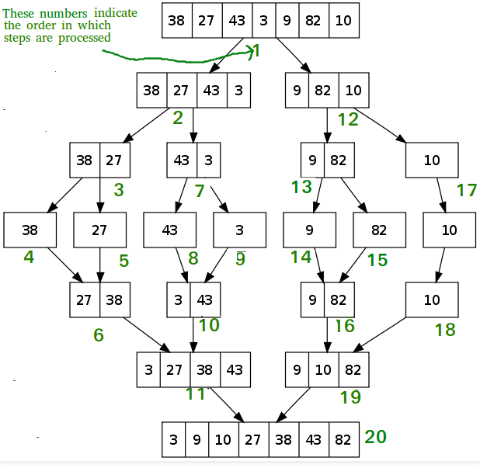

优化2: 对于小规模数组, 可使用插入排序

In [80]:
def mergeSort(alist):
    if len(alist) > 1:
        mid = len(alist) // 2

        # 向下划分
        left = alist[:mid]
        right = alist[mid:]

        left = mergeSort(left)
        right = mergeSort(right)

        if left[-1] <= right[0]:   # 此时左右都是排好序的，只需要比较这两者
            alist = left + right   # 优化1: 对于arr[mid] <= arr[mid+1]的情况,不进行merge
            return alist           # 对于近乎有序的数组非常有效,但是对于一般情况,有一定的性能损失

        l = r = k = 0
        while l < len(left) and r < len(right):  # 在k处放入最小值
            if left[l] <= right[r]:
                alist[k] = left[l]
                l += 1
            else:
                alist[k] = right[r]
                r += 1
            k += 1

        while l < len(left):    # 剩余部分相对跟大，直接加入尾端,如果还有的话
            alist[k] = left[l]  
            l += 1
            k += 1

        while r < len(right):    
            alist[k] = right[r]  
            r += 1
            k += 1
        
    return alist

In [74]:
list_2 = gen_alist(10, 20)
print(isSorted(list_2))

list_2_ = mergeSort(list_2)
print(isSorted(list_2_))

False
True


In [76]:
# 另一种实现
# def merge_sort(alist):
#     n = len(alist)
#     if n <= 1:
#         return alist
#     mid = n // 2

#     left_list = merge_sort(alist[:mid])
#     right_list = merge_sort(alist[mid:])
#     # return left_list, right_list
#     left_pointer, right_pointer = 0, 0
#     result = []

#     while left_pointer < len(left_list) and right_pointer < len(right_list):
#         if left_list[left_pointer] <= right_list[right_pointer]:
#             result.append(left_list[left_pointer])
#             left_pointer += 1
#         else:
#             result.append(right_list[right_pointer])
#             right_pointer += 1

#     result += left_list[left_pointer:]
#     result += right_list[right_pointer:]
#     return result

In [91]:
# 自底向上的归并排序
def merge(alist, l, mid, r):
    temp = alist[l : r+1]
    
    i = l; j = mid + 1  # 初始化，i指向左半部分的起始索引位置l；j指向右半部分起始索引位置mid+1
    for k in range(l, r+1):
        if i > mid:     # 如果左半部分元素已经全部处理完毕
            alist[k] = temp[j-l]
            j += 1 
        elif j > r:     # 如果右半部分元素已经全部处理完毕
            alist[k] = temp[i-l]
            i += 1
        elif temp[i-l] < temp[j-l]:  # 左半部分所指元素 < 右半部分所指元素
            alist[k] = temp[i-l]
            i += 1
        else:
            alist[k] = temp[j-l]     # 左半部分所指元素 >= 右半部分所指元素
            j += 1
            
def mergeSortBU(alist):
    n = len(alist)
    size = 1
    while size < n:
        for i in range(0, n - size, 2*size):
            if alist[i+size-1] > alist[i+size]:  # 对于arr[mid] <= arr[mid+1]的情况,不进行merge
                merge(alist, i, i+size-1, min(i+2*size-1,n-1))
        size += size
    return alist

In [92]:
list_2 = gen_alist(10, 20)
print(isSorted(list_2))

list_2_ = mergeSortBU(list_2)
print(isSorted(list_2_))

False
True


In [79]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('mergeSort(alist)', 'from __main__ import mergeSort,alist')
print('归并排序: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('mergeSort(blist)', 'from __main__ import mergeSort,blist')
print('归并排序(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('mergeSort(clist)', 'from __main__ import mergeSort,clist')
print('归并排序(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('mergeSort(dlist)', 'from __main__ import mergeSort,dlist')
print('归并排序(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('mergeSort(elist)', 'from __main__ import mergeSort,elist')
print('归并排序(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

归并排序: 0.02354379999997036 s
归并排序(近乎有序输入): 0.013711800000237417 s
归并排序(有序输入): 0.0051824000001943205 s
归并排序(逆序有序输入): 0.02055879999898025 s
归并排序(多重复值输入): 0.022611100001086015 s
True
True
True
True
True


In [93]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('mergeSortBU(alist)', 'from __main__ import mergeSortBU,alist')
print('(自底向上)归并排序: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('mergeSortBU(blist)', 'from __main__ import mergeSortBU,blist')
print('(自底向上)归并排序(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('mergeSortBU(clist)', 'from __main__ import mergeSortBU,clist')
print('(自底向上)归并排序(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('mergeSortBU(dlist)', 'from __main__ import mergeSortBU,dlist')
print('(自底向上)归并排序(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('mergeSortBU(elist)', 'from __main__ import mergeSortBU,elist')
print('(自底向上)归并排序(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

(自底向上)归并排序: 0.020217999999658787 s
(自底向上)归并排序(近乎有序输入): 0.009323599999333965 s
(自底向上)归并排序(有序输入): 0.0007436000014422461 s
(自底向上)归并排序(逆序有序输入): 0.019308499999169726 s
(自底向上)归并排序(多重复值输入): 0.01779800000076648 s
True
True
True
True
True


# 快速排序Quick sort

快速排序使用分治法（Divide and conquer）策略来把一个序列（list）分为两个子序列（sub-lists）。

首先从数列中挑出一个元素，称为「基准」pivot。重新排序，所有比基准值小的元素摆放在基准前面，所有比基准值大的元素摆在基准后面（相同的数可以到任何一边）。这个称为分区（partition）操作。之后，在子序列中重复排序，直到最后整个数据序列排序完成。

![8](./pic/quick.gif)

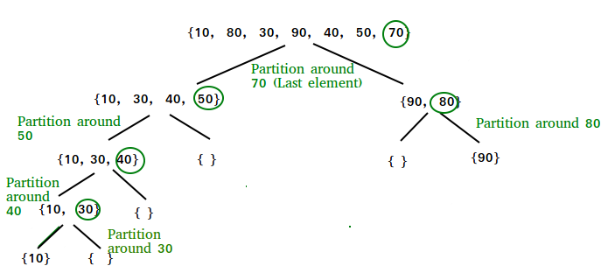

In [4]:
def partition(alist, left, right):
    """以pivot进行分组"""
    pivot = alist[right]
    # init left_index
    from_left_index = left

    for i in range(left, right):
        if alist[i] <= pivot:
            alist[from_left_index], alist[i] = alist[i], alist[from_left_index]
            from_left_index += 1

    # 交换：‘> pivot’的第一个元素 和 pivot元素
    alist[from_left_index], alist[right] = alist[right], alist[from_left_index]

    return from_left_index

def _quickSort(alist, left, right):
    if right > left:
        p_index = partition(alist, left, right)
        _quickSort(alist, left, p_index - 1)
        _quickSort(alist, p_index + 1, right)


def quickSort(alist):

    if len(alist) <= 1:
        return alist

    _quickSort(alist, 0, len(alist)-1)

    return alist

以上方式存在一些问题：

1. 直接使用最后一个或者第一个元素作为pivot，可能退化为O（N2）的算法，近乎有序数组可以看出，深度将不会是log（N）
2. 对于有多重复元素的数组，也会出现深度退化，算法性能下降，原因在于=pivot必定会在某一边聚集。

解决以上问题的方法如下：

In [130]:
import random

In [145]:
def partition_2(alist, l, r):
    """双路快速排序的partition，优化有多重复元素的数组的退化"""
    rand_i = randint(l, r)
    alist[r], alist[rand_i] = alist[rand_i], alist[r]   # 优化：防止近乎有序数组退化
    pivot = alist[r]
    
    i = l; j = r-1
    while True:
        # arr[l...i) <= pivot; arr(j...r-1] >= pivot
        while i <= r-1 and alist[i] < pivot:  # no swap
            i += 1
        while j >= l and alist[j] > pivot:    # no swap
            j -= 1
        if i > j:
            break
        # i:此时>=pivot  j:此时<=pivot
        alist[i], alist[j] = alist[j], alist[i]
        i += 1
        j -= 1  # 指向下一个需要处理的元素
        
    alist[r], alist[i] = alist[i], alist[r]
    return i

def _quickSort_2(alist, l, r):
    if r > l:
        p = partition_2(alist, l, r)
        _quickSort_2(alist, l, p-1)
        _quickSort_2(alist, p+1, r)

def quickSort_2(alist):
    if len(alist) <= 1:
        return alist
    random.seed(506)
    _quickSort_2(alist, 0, len(alist)-1)
    return alist

In [148]:
def partition_3(alist, l, r):
    """3-way快排, 多重复值输入的情况，效果更好"""
    rand_i = randint(l, r)
    alist[r], alist[rand_i] = alist[rand_i], alist[r]
    pivot = alist[r]
    
    lt = l-1    # arr[l...lt] < v      <pivot的最大
    gt = r;     # arr[gt...r-1] > v    >pivot的最小
    i = l;      # arr[lt...i) == v     =pivot的下一个，待处理
    while i < gt:
        if alist[i] < pivot:
            alist[i], alist[lt+1] = alist[lt+1], alist[i]
            i += 1
            lt += 1
        elif alist[i] == pivot:
            i += 1
        else:
            alist[i], alist[gt-1] = alist[gt-1], alist[i]
            gt -= 1   # 此处gt ！= pivot，i不变
            
    alist[r], alist[gt] = alist[gt], alist[r]
    return lt, gt

def _quickSort_3(alist, l, r):
    if r > l:
        lt, gt = partition_3(alist, l, r)
        _quickSort_3(alist, l, lt)
        _quickSort_3(alist, gt+1, r)

def quickSort_3(alist):
    if len(alist) <= 1:
        return alist
    random.seed(506)
    _quickSort_3(alist, 0, len(alist)-1)
    return alist

In [125]:
def quicksort(arr):
    """不是in-place的实现"""
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

In [149]:
list_2 = gen_alist(10, 20)
print(isSorted(list_2))

list_2_ = quickSort_3(list_2)
print(isSorted(list_2_))

False
True


In [5]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('quickSort(alist)', 'from __main__ import quickSort,alist')
print('快速排序: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('quickSort(blist)', 'from __main__ import quickSort,blist')
print('快速排序(近乎有序输入): %s s' % t2.timeit(number=1))

# t3 = timeit.Timer('quickSort(clist)', 'from __main__ import quickSort,clist')
# print('快速排序(有序输入): %s s' % t3.timeit(number=1))

# t4 = timeit.Timer('quickSort(dlist)', 'from __main__ import quickSort,dlist')
# print('快速排序(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('quickSort(elist)', 'from __main__ import quickSort,elist')
print('快速排序(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
# print(isSorted(clist))
# print(isSorted(dlist))
print(isSorted(elist))

快速排序: 0.0121947 s
快速排序(近乎有序输入): 0.3875001 s
快速排序(多重复值输入): 0.20442990000000005 s
True
True
True


In [147]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('quickSort_2(alist)', 'from __main__ import quickSort_2,alist')
print('快速排序2: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('quickSort_2(blist)', 'from __main__ import quickSort_2,blist')
print('快速排序2(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('quickSort_2(clist)', 'from __main__ import quickSort_2,clist')
print('快速排序2(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('quickSort_2(dlist)', 'from __main__ import quickSort_2,dlist')
print('快速排序2(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('quickSort_2(elist)', 'from __main__ import quickSort_2,elist')
print('快速排序2(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

快速排序2: 0.01649840000027325 s
快速排序2(近乎有序输入): 0.015996599999198224 s
快速排序2(有序输入): 0.014852100001007784 s
快速排序2(逆序有序输入): 0.013503700000001118 s
快速排序2(多重复值输入): 0.014259700001275633 s
True
True
True
True
True


In [150]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('quickSort_3(alist)', 'from __main__ import quickSort_3,alist')
print('快速排序3: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('quickSort_3(blist)', 'from __main__ import quickSort_3,blist')
print('快速排序3(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('quickSort_3(clist)', 'from __main__ import quickSort_3,clist')
print('快速排序3(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('quickSort_3(dlist)', 'from __main__ import quickSort_3,dlist')
print('快速排序3(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('quickSort_3(elist)', 'from __main__ import quickSort_3,elist')
print('快速排序3(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

快速排序3: 0.02155779999884544 s
快速排序3(近乎有序输入): 0.025868799995805603 s
快速排序3(有序输入): 0.03465969999524532 s
快速排序3(逆序有序输入): 0.033072899997932836 s
快速排序3(多重复值输入): 0.0035140999971190467 s
True
True
True
True
True


# 堆排序Heap sort

堆积是一个近似完全二叉树的结构，并同时满足堆积的性质：即子结点的键值或索引总是小于（或者大于）它的父节点。堆排序实现分为两种方法：

- 大顶堆：每个节点的值都大于或等于其子节点的值，在堆排序算法中用于升序排列；
- 小顶堆：每个节点的值都小于或等于其子节点的值，在堆排序算法中用于降序排列；

![12](./pic/heap.gif)

In [9]:
class MaxHeap():
    def __init__(self):
        self.heaplist = [0]  # 存放元素的list, index从1开始，index0为‘’
        self.Count = 0       # 堆中元素个数
    
    @staticmethod
    def size():
        return self.Count
    
    @staticmethod
    def isEmpty():
        return self.Count == 0
    
    def insert(self, item):
        """最大堆中插入一个新的元素 item"""
        self.heaplist.append(item)
        self._shiftUp(self.Count + 1)
        self.Count += 1
        
    def _shiftUp(self, i):
        """尾端添加元素，上浮到MaxHeap中的正确位置"""
        while i > 1 and self.heaplist[i//2] < self.heaplist[i]:  #  index/2父节点
            self.heaplist[i//2], self.heaplist[i] = self.heaplist[i], self.heaplist[i//2]
            i //= 2
            
    @staticmethod
    def getMax():
        """获取最大堆中的堆顶元素的值"""
        assert self.Count > 0
        return self.heaplist[1]
    
    def extractMax(self):
        """从最大堆中取出堆顶元素, 即堆中所存储的最大数据"""
        assert self.Count > 0
        ret = self.heaplist[1]
        # 仍然保持完全二叉树的做法
        self.heaplist[1], self.heaplist[self.Count] = self.heaplist[self.Count], self.heaplist[1]
        self.Count -= 1
        self._shiftDown(1)
        return ret
    
#     def _shiftDown(self, i):
#         """首端元素（index==1）下沉到MaxHeap中正确位置"""
#         while i*2 <= self.Count:  # index*2左孩子，index*2+1右孩子
#             child = i * 2
#             # 找到左右孩子中的最大一个
#             if child+1 <= self.Count and self.heaplist[child+1] > self.heaplist[child]:
#                 child += 1
#             # 最大值与i节点比较
#             if self.heaplist[i] >= self.heaplist[child]:
#                 break
#             # swap: 每次都swap比较低效，可以进行优化
#             self.heaplist[child], self.heaplist[i] = self.heaplist[i], self.heaplist[child]
#             i = child
            
    def _shiftDown(self, i):
        """优化"""
        target = self.heaplist[i]
        while i*2 <= self.Count:
            child = i * 2
            if child+1 <= self.Count and self.heaplist[child+1] > self.heaplist[child]:
                child += 1
            if target >= self.heaplist[child]:
                break
            self.heaplist[i] = self.heaplist[child]  # 只将最大的child向上赋值，暂时不管另存的target
            i = child
        # 找到正确下沉位置后再赋值
        self.heaplist[i] = target
    
    def buildHeap(self, alist):
        """通过一个给定数组创建一个最大堆, heapify"""
        self.Count = len(alist)
        i = len(alist) // 2
        self.heaplist = [0] + alist[:]
        
        while i > 0:
            self._shiftDown(i)
            i -= 1
            

# heapSort1, 将所有的元素依次添加到堆中, 在将所有元素从堆中依次取出来
#            无论是创建堆的过程, 还是从堆中依次取出元素的过程, 时间复杂度均为O(nlogn)
#            整个堆排序的整体时间复杂度为O(nlogn)
def heapSort_1(alist):
    maxheap = MaxHeap()
    for i in range(len(alist)):  # 逐个加元素创建堆
        maxheap.insert(alist[i])
        
    for i in range(len(alist)-1, -1, -1):
        alist[i] = maxheap.extractMax()
    return alist
        
        
# heapSort2, 借助我们的heapify过程创建堆
#            此时, 创建堆的过程时间复杂度为O(n), 将所有元素依次从堆中取出来, 实践复杂度为O(nlogn)
#            堆排序的总体时间复杂度依然是O(nlogn)
def heapSort_2(alist):
    """heapify"""
    maxheap = MaxHeap()
    maxheap.buildHeap(alist)   # O(n)
    for i in range(len(alist)-1, -1, -1):
        alist[i] = maxheap.extractMax()
    return alist

In [13]:
def heapSort_3(alist):
    """原地的堆排序, 注意此时index从0开始, i*2+1:左孩子"""
    def shiftDown(alist, n, i):
        """n: shiftDown操作的最后一个index"""
        target = alist[i]
        while i*2+1 < n:
            child = i*2 + 1
            if child+1 < n and alist[child+1] > alist[child]:
                child += 1
            if target >= alist[child]:
                break
            alist[i] = alist[child]  # 只将最大的child向上赋值，暂时不管另存的target
            i = child
        # 找到正确下沉位置后再赋值
        alist[i] = target
        
    # heapify
    n = len(alist)
    i = (n-1-1) // 2  # 从(最后一个元素的索引-1)/2开始
        
    while i >= 0:
        shiftDown(alist, n, i)
        i -= 1
        
    j = n - 1
    while j > 0:                                  # 只剩一个元素自有序
        alist[0], alist[j] = alist[j], alist[0]   # 最大置于最后index
        shiftDown(alist, j, 0)                    # 未排序部分将max置于index0
        j -= 1                                    # shiftDown区间更新
        
    return alist

In [14]:
list_2 = gen_alist(10, 20)
print(isSorted(list_2))

list_2_ = heapSort_3(list_2)
print(isSorted(list_2_))

False
True


In [15]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('heapSort_1(alist)', 'from __main__ import heapSort_1,alist')
print('堆排序1: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('heapSort_1(blist)', 'from __main__ import heapSort_1,blist')
print('堆排序1(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('heapSort_1(clist)', 'from __main__ import heapSort_1,clist')
print('堆排序1(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('heapSort_1(dlist)', 'from __main__ import heapSort_1,dlist')
print('堆排序1(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('heapSort_1(elist)', 'from __main__ import heapSort_1,elist')
print('堆排序1(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

堆排序1: 0.030931200000000002 s
堆排序1(近乎有序输入): 0.046810700000000004 s
堆排序1(有序输入): 0.04917600000000001 s
堆排序1(逆序有序输入): 0.027905000000000013 s
堆排序1(多重复值输入): 0.028445200000000004 s
True
True
True
True
True


In [16]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('heapSort_2(alist)', 'from __main__ import heapSort_2,alist')
print('heapify堆排序2: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('heapSort_2(blist)', 'from __main__ import heapSort_2,blist')
print('heapify堆排序2(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('heapSort_2(clist)', 'from __main__ import heapSort_2,clist')
print('heapify堆排序2(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('heapSort_2(dlist)', 'from __main__ import heapSort_2,dlist')
print('heapify堆排序2(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('heapSort_2(elist)', 'from __main__ import heapSort_2,elist')
print('heapify堆排序2(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

heapify堆排序1: 0.02971400000000557 s
heapify堆排序1(近乎有序输入): 0.02966220000000419 s
heapify堆排序1(有序输入): 0.03281399999999479 s
heapify堆排序1(逆序有序输入): 0.027909000000001072 s
heapify堆排序1(多重复值输入): 0.041342199999995444 s
True
True
True
True
True


In [17]:
# make a copy
alist = origin_list[:]
blist = origin_nearly_sorted[:]
clist = origin_sorted_list[:]
dlist = origin_reversed_list[:]
elist = origin_few_unique[:]

t1 = timeit.Timer('heapSort_3(alist)', 'from __main__ import heapSort_3,alist')
print('堆排序in-place: %s s' % t1.timeit(number=1))

t2 = timeit.Timer('heapSort_3(blist)', 'from __main__ import heapSort_3,blist')
print('堆排序in-place(近乎有序输入): %s s' % t2.timeit(number=1))

t3 = timeit.Timer('heapSort_3(clist)', 'from __main__ import heapSort_3,clist')
print('堆排序in-place(有序输入): %s s' % t3.timeit(number=1))

t4 = timeit.Timer('heapSort_3(dlist)', 'from __main__ import heapSort_3,dlist')
print('堆排序in-place(逆序有序输入): %s s' % t4.timeit(number=1))

t5 = timeit.Timer('heapSort_3(elist)', 'from __main__ import heapSort_3,elist')
print('堆排序in-place(多重复值输入): %s s' % t5.timeit(number=1))

print(isSorted(alist))
print(isSorted(blist))
print(isSorted(clist))
print(isSorted(dlist))
print(isSorted(elist))

堆排序in-place: 0.02168500000000506 s
堆排序in-place(近乎有序输入): 0.022843199999996955 s
堆排序in-place(有序输入): 0.028306400000005283 s
堆排序in-place(逆序有序输入): 0.028384800000011978 s
堆排序in-place(多重复值输入): 0.019646899999997913 s
True
True
True
True
True


# 计数排序Counting sort

稳定的线性时间排序算法。

![9](./pic/count.gif)

In [162]:
def countSort(alist, maximum):
    length = len(alist)
    count_list = [0] * (maximum + 1)  # 0
    blist = [0] * length
    
    for i in range(length):
        count_list[alist[i]] += 1  # 计数
        print(count_list)
    print('='*30)
    for i in range(1, maximum+1):  
        count_list[i] = count_list[i] + count_list[i-1]  # 累加为前i个数据的计数
        print(count_list)
    print('='*30)
    for i in range(length):
        blist[count_list[alist[i]] - 1] = alist[i]  # 累加计数-1 即为该值对应于新list的最后一个inxdex
        count_list[alist[i]] -= 1
        print(blist)
    return blist

In [163]:
b = countSort([1, 3, 3, 2, 5, 3, 0, 0, 6, 4, 2, 4, 5], 6)
print(b)

[0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 2, 0, 0, 0]
[0, 1, 1, 2, 0, 0, 0]
[0, 1, 1, 2, 0, 1, 0]
[0, 1, 1, 3, 0, 1, 0]
[1, 1, 1, 3, 0, 1, 0]
[2, 1, 1, 3, 0, 1, 0]
[2, 1, 1, 3, 0, 1, 1]
[2, 1, 1, 3, 1, 1, 1]
[2, 1, 2, 3, 1, 1, 1]
[2, 1, 2, 3, 2, 1, 1]
[2, 1, 2, 3, 2, 2, 1]
[2, 3, 2, 3, 2, 2, 1]
[2, 3, 5, 3, 2, 2, 1]
[2, 3, 5, 8, 2, 2, 1]
[2, 3, 5, 8, 10, 2, 1]
[2, 3, 5, 8, 10, 12, 1]
[2, 3, 5, 8, 10, 12, 13]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 2, 0, 3, 3, 0, 0, 0, 5, 0]
[0, 0, 1, 0, 2, 3, 3, 3, 0, 0, 0, 5, 0]
[0, 0, 1, 0, 2, 3, 3, 3, 0, 0, 0, 5, 0]
[0, 0, 1, 0, 2, 3, 3, 3, 0, 0, 0, 5, 0]
[0, 0, 1, 0, 2, 3, 3, 3, 0, 0, 0, 5, 6]
[0, 0, 1, 0, 2, 3, 3, 3, 0, 4, 0, 5, 6]
[0, 0, 1, 2, 2, 3, 3, 3, 0, 4, 0, 5, 6]
[0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 0, 5, 6]
[0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6]
[0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6]


# 桶排序Bucket Sort

将数组划分到一定数量的有序的桶里，然后再对每个桶中的数据进行排序，最后再将各个桶里的数据有序的合并到一起

![9](./pic/Bucket.gif)

# 基数排序Radix sort

非比较型整数排序算法，其原理是将整数按位数切割成不同的数字，然后按每个位数分别比较。由于整数也可以表达字符串和特定格式的浮点数，所以基数排序也仅限于整数。它首先将所有待比较数值，统一为同样的数位长度，数位较短的数前面补零。然后，从最低位开始，依次进行一次排序。这样从最低位排序一直到最高位排序完成以后，数列就变成一个有序序列。

![10](./pic/radix.gif)

reference:

https://www.v2ex.com/t/513678

https://zhuanlan.zhihu.com/p/41923298

https://www.youtube.com/watch?v=MtQL_ll5KhQ&list=PLqM7alHXFySHrGIxeBOo4-mKO4H8j2knW&index=1 GeeeksForGeeks

